In [9]:
# Bibliotecas de manipualção e visualização de dados
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

# Classes dos modelo
from sklearn.linear_model import Perceptron

# Funções de avaliação dos modelos
from sklearn.metrics import (confusion_matrix, 
                             ConfusionMatrixDisplay,
                             classification_report)

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

In [10]:
#Carregando o dataset
dataset = pd.read_csv("https://raw.githubusercontent.com/cynthiamaia/Monitoria-DeepLearning-CIN-AI/main/Datasets/Iris.csv")
# Mapeando os valores da classe para inteiro (para fins de visualização da região de decisão)
dataset['Species'] = pd.factorize(dataset['Species'])[0]

In [11]:
#Vamos usar somente duas features PetalLengthCm e PetalWidthCm
X = dataset.iloc[:,[2,3]]
y = dataset.iloc[:,[4]]

# para treinar e avaliar um classificador, precisamos dividir o dataset em dois conjuntos, ...
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
#stratify -> garantir que a proporção das classes da variável alvo (y) seja mantida 

In [12]:
y_test

,Species
90,1
3,0
27,0
49,0
1,0
149,2
92,1
104,2
113,2
98,1


In [13]:
# ... referenciando o modelo
model = Perceptron()

#treinando o modelo
model.fit(X_train, y_train)

#predição
y_pred = model.predict(X_test)

In [18]:
# qual o resultado para esse classificador?
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        13
           1       0.71      1.00      0.83        12
           2       1.00      0.77      0.87        13

    accuracy                           0.87        38
   macro avg       0.90      0.87      0.87        38
weighted avg       0.91      0.87      0.87        38



[[0.84615385 0.15384615 0.        ]
 [0.         1.         0.        ]
 [0.         0.23076923 0.76923077]]

 Labels:[0 1 2] 



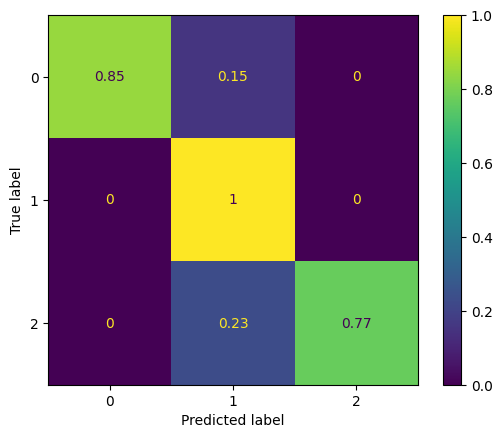

In [21]:
# a função confusion matrix retorna uma matriz com a contagem de como cada 
# uma das classes está sendo classificada corretamente ou erroneamente
cm = confusion_matrix(y_test, y_pred, labels=model.classes_, normalize="true")
print(cm)

print(f"\n Labels:{model.classes_} \n")

#display_labels - define como será a ordem das classes na matriz
disp_cm = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp_cm.plot()

In [22]:
def show_decision_region(X, y, model):
    feature_0 = X.columns[0]
    feature_1 = X.columns[1]

    plot_decision_regions(np.array([X[feature_0].values,
                                    X[feature_1].values]).T,
                                    y.values.flatten(), model)
    plt.xlabel(feature_0)
    plt.ylabel(feature_1)

    plt.title(model.__class__.__name__)
    plt.show()

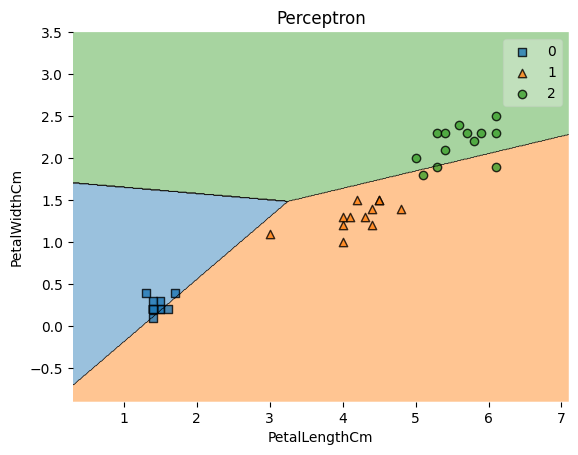

In [23]:
show_decision_region(X_test, y_test, model)
